# 1. Import library and dataset

In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [108]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# 2. Data Exploration

Data fields

Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


# 3. Data Preprocessing

In [109]:
df.shape

(1460, 81)

In [110]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [111]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [112]:
# Display the first few rows of the dataset
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [113]:
# Check data types of each column
print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [114]:
# Generate summary statistics for numerical features
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [115]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [117]:
# Check for missing data
missing_data = df.isnull().sum()
print(missing_data)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [118]:
# Feature Engineering
# Creating a 'TotalSF' feature
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF']

In [119]:
# Outlier Handling
# Removing outliers using z-score
from scipy import stats
z_scores = stats.zscore(df['SalePrice'])
df = df[(z_scores < 3)]

# 4. Exploratory Visualization

count      1438.000000
mean     175844.522253
std       67475.861228
min       34900.000000
25%      129500.000000
50%      161500.000000
75%      210000.000000
max      415298.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_32/3592553563.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});


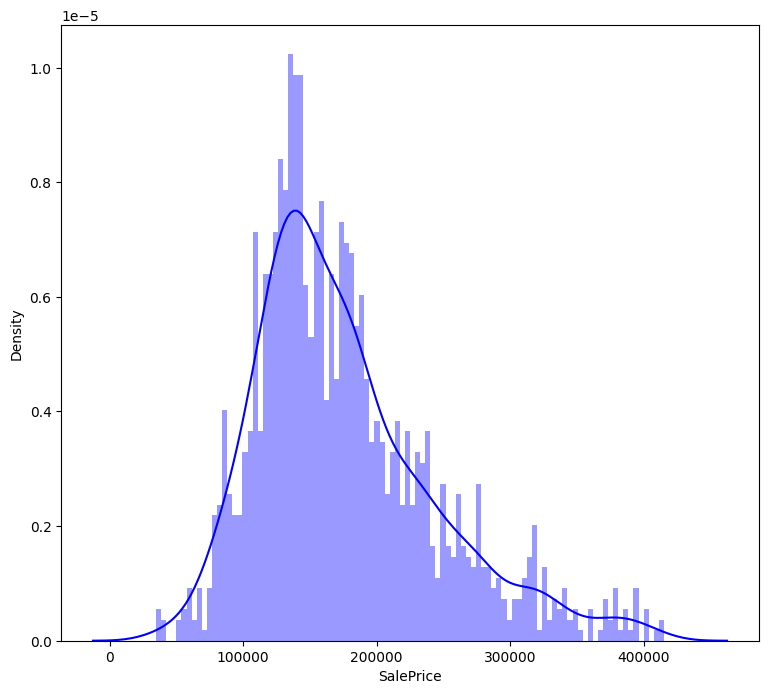

In [120]:
# Now let us take a look at how the house prices are distributed
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4});

<Axes: xlabel='SalePrice', ylabel='Count'>

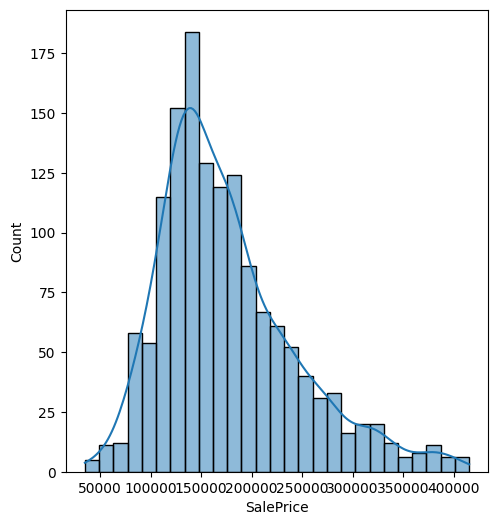

In [121]:
# Example of histogram and box plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True)

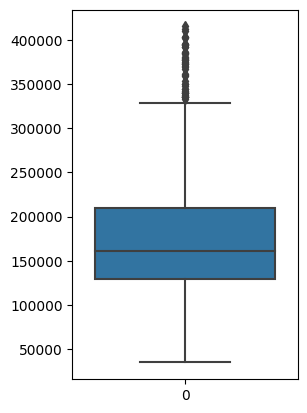

In [122]:
plt.subplot(1, 2, 2)
sns.boxplot(df['SalePrice'])
plt.show()

In [123]:
numeric_df = df.select_dtypes(np.number).corr()

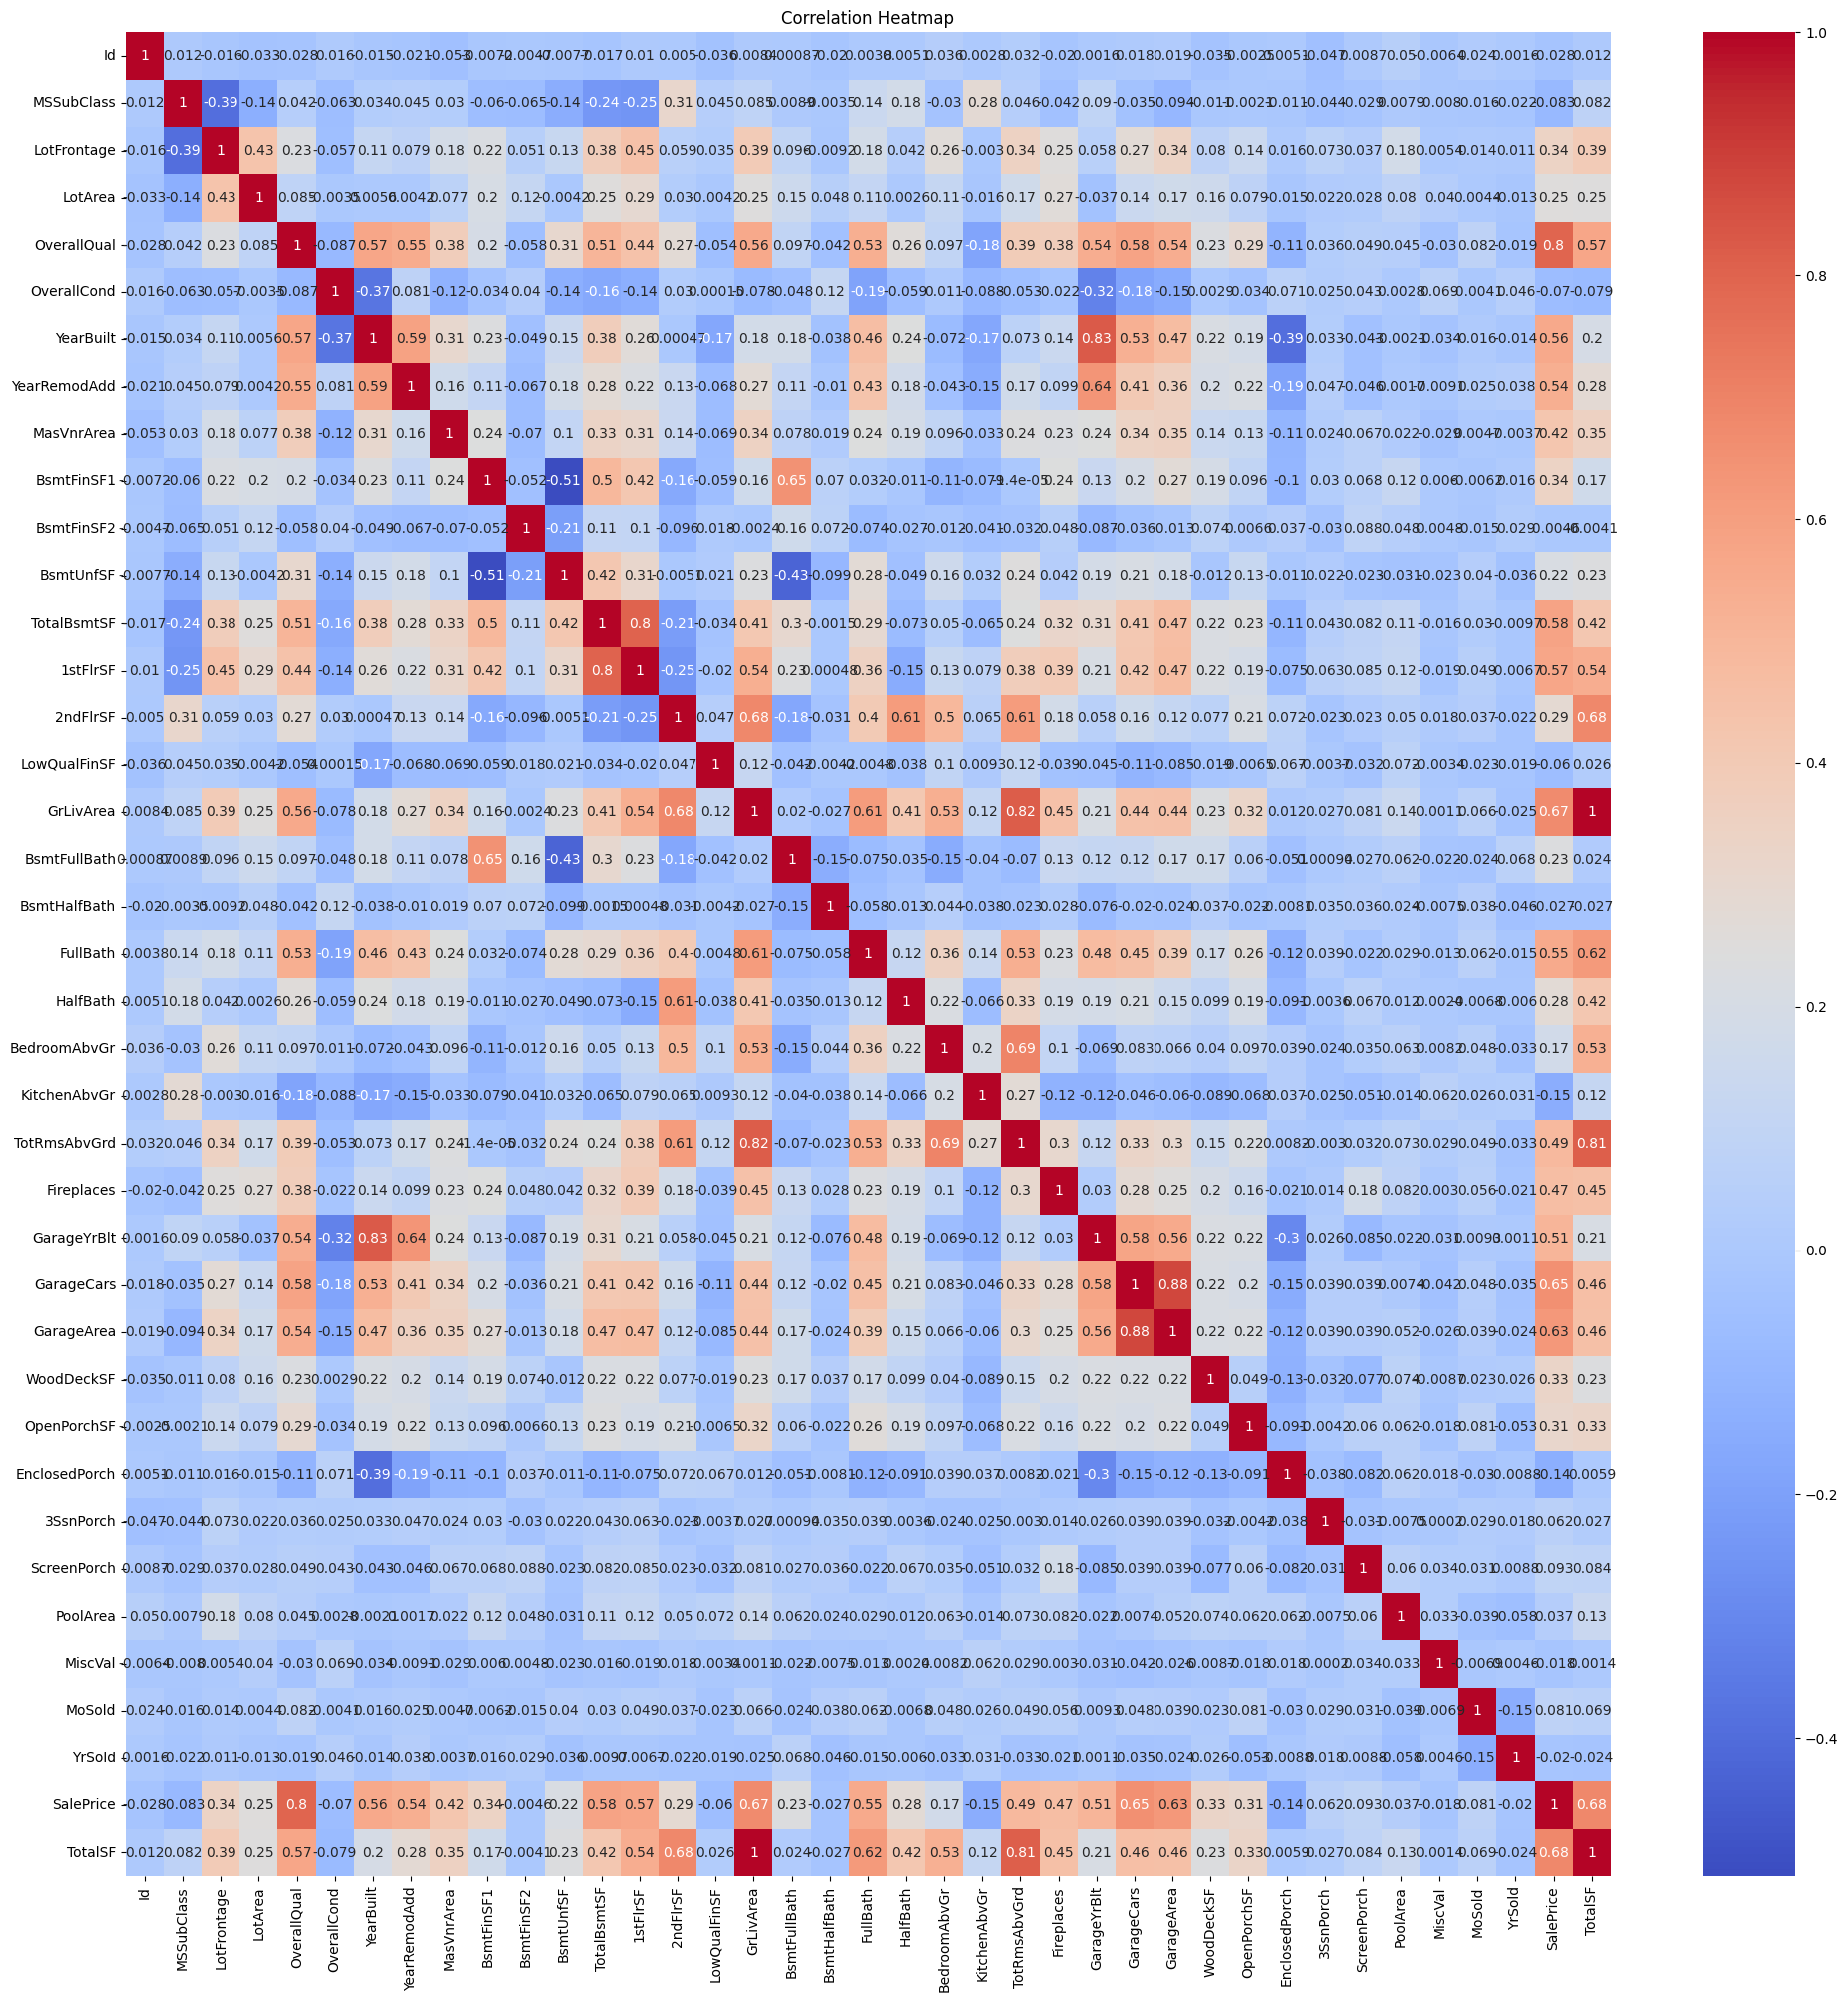

In [124]:
plt.figure(figsize=(24, 24))
sns.heatmap(numeric_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


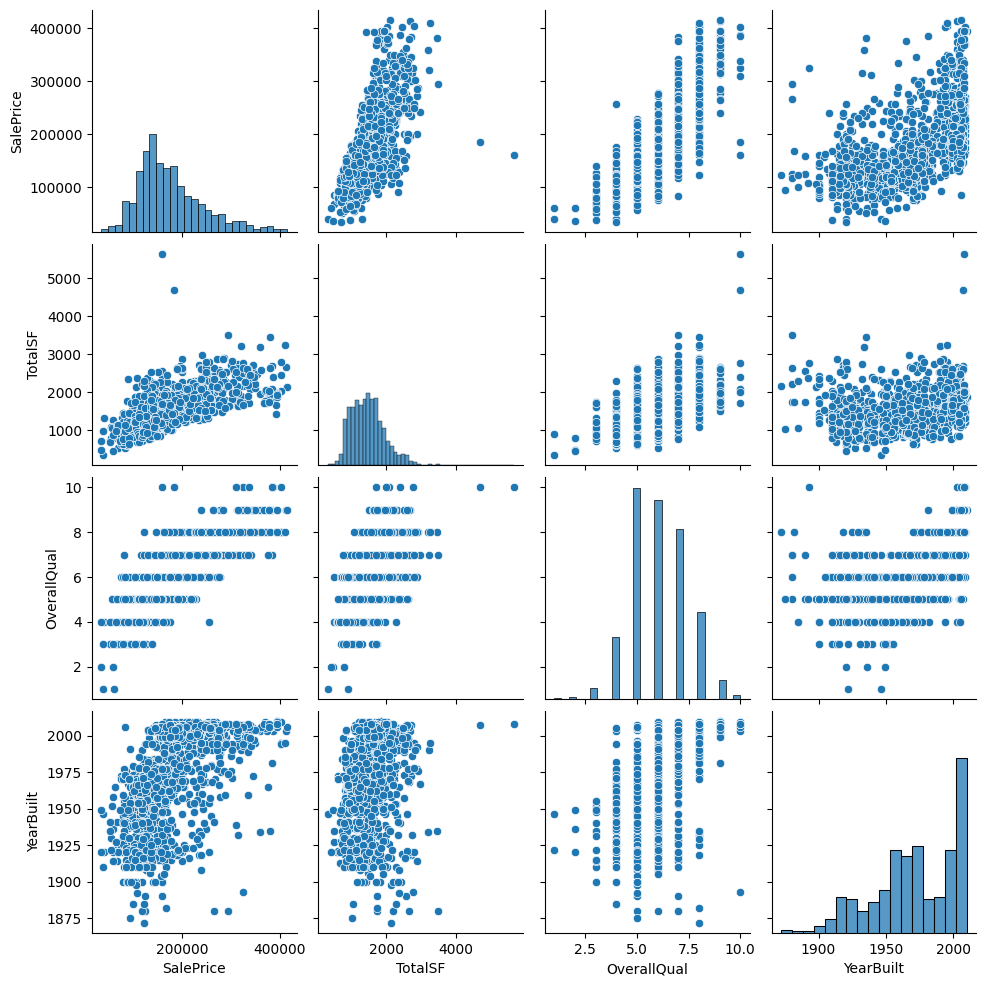

In [125]:
# Create pair plots for a subset of numerical features
sns.pairplot(df[['SalePrice', 'TotalSF', 'OverallQual', 'YearBuilt']])
plt.show()

In [126]:
# select only the numerical ones.
df_numerical = df.select_dtypes(include = ['float64', 'int64'])
df_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,61,0,0,0,0,0,2,2008,208500,1710
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,5,2007,181500,1262
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,42,0,0,0,0,0,9,2008,223500,1786
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,35,272,0,0,0,0,2,2006,140000,1717
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,84,0,0,0,0,0,12,2008,250000,2198


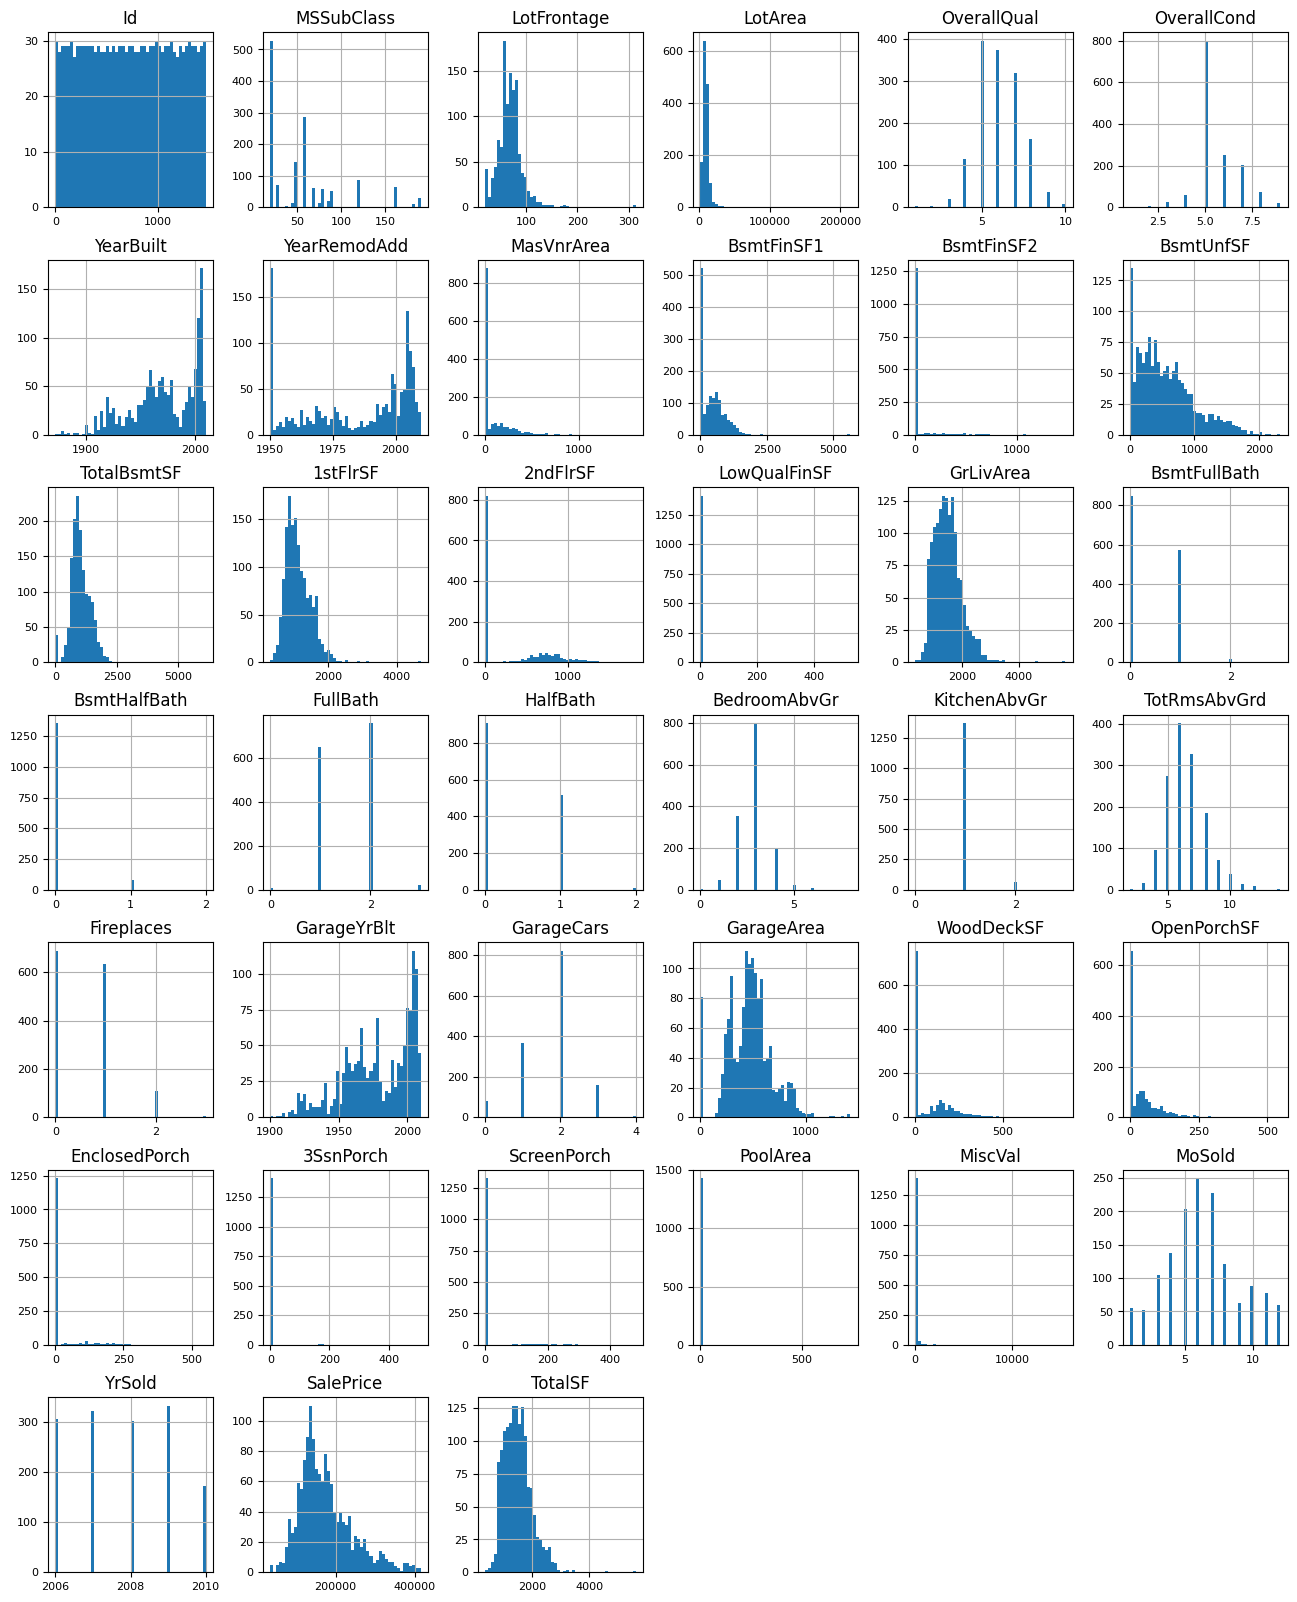

In [127]:
# plot the distribution for all the numerical features
df_numerical.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

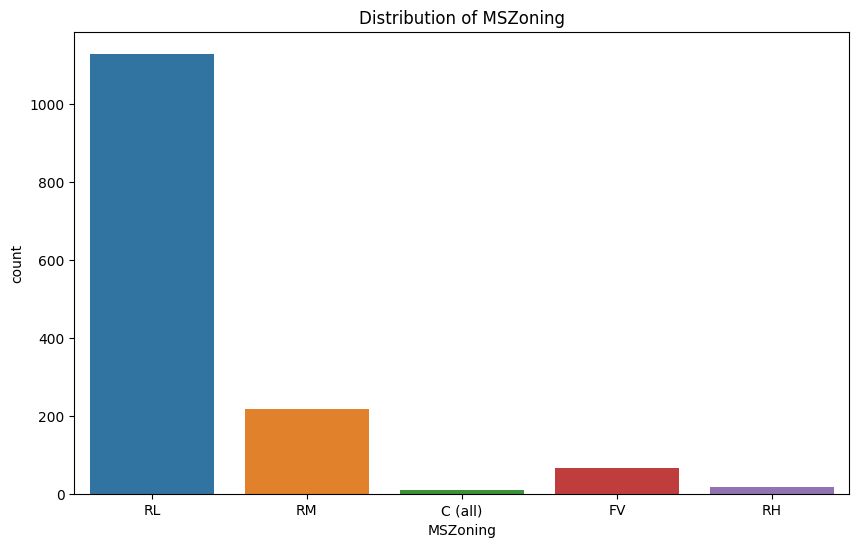

In [128]:
# Create a bar plot to visualize the distribution of a categorical variable
plt.figure(figsize=(10, 6))
sns.countplot(x='MSZoning', data=df)
plt.title("Distribution of MSZoning")
plt.show()

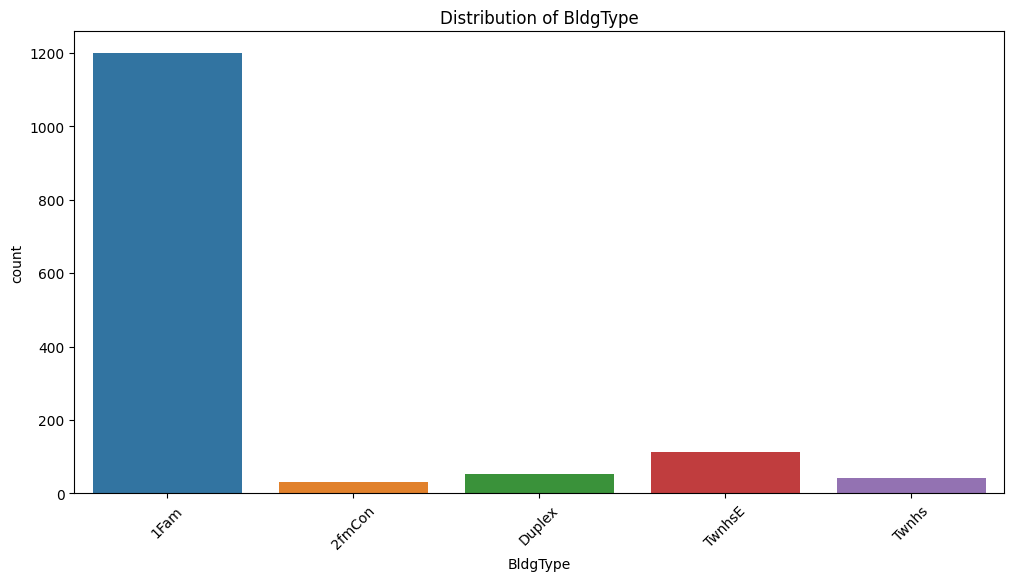

In [129]:
# Create a bar plot to visualize the distribution of the 'BldgType' variable
plt.figure(figsize=(12, 6))
sns.countplot(x='BldgType', data=df)
plt.title("Distribution of BldgType")
plt.xticks(rotation=45)
plt.show()

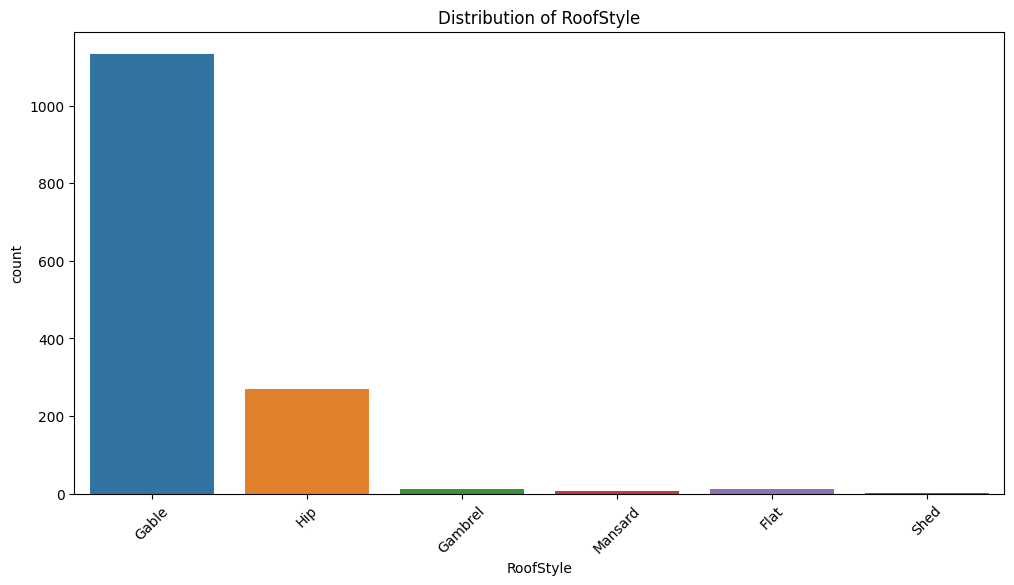

In [130]:
# Create a bar plot to visualize the distribution of the 'RoofStyle' variable
plt.figure(figsize=(12, 6))
sns.countplot(x='RoofStyle', data=df)
plt.title("Distribution of RoofStyle")
plt.xticks(rotation=45)
plt.show()

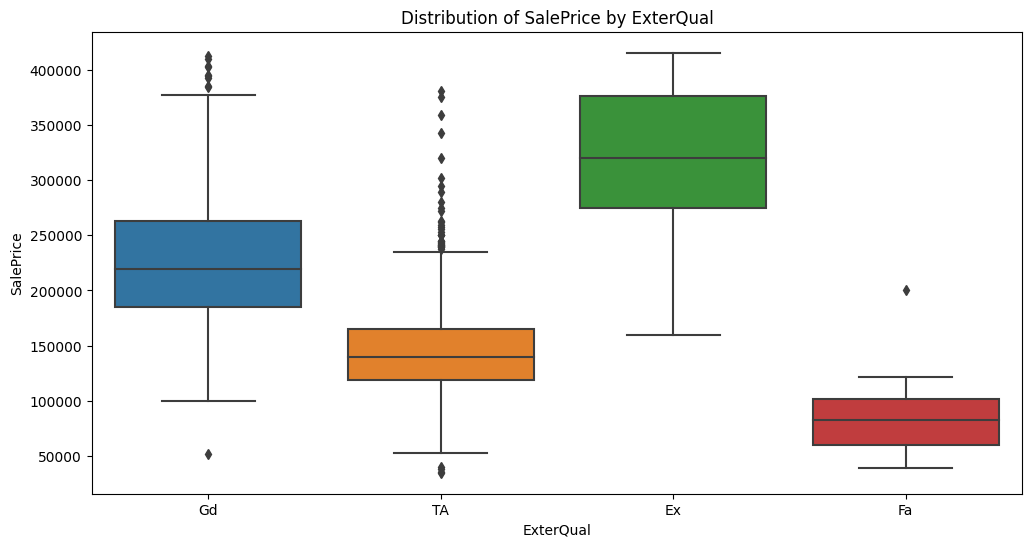

In [131]:
# Create a box plot to visualize the distribution of 'SalePrice' by 'ExterQual'
plt.figure(figsize=(12, 6))
sns.boxplot(x='ExterQual', y='SalePrice', data=df)
plt.title("Distribution of SalePrice by ExterQual")
plt.show()

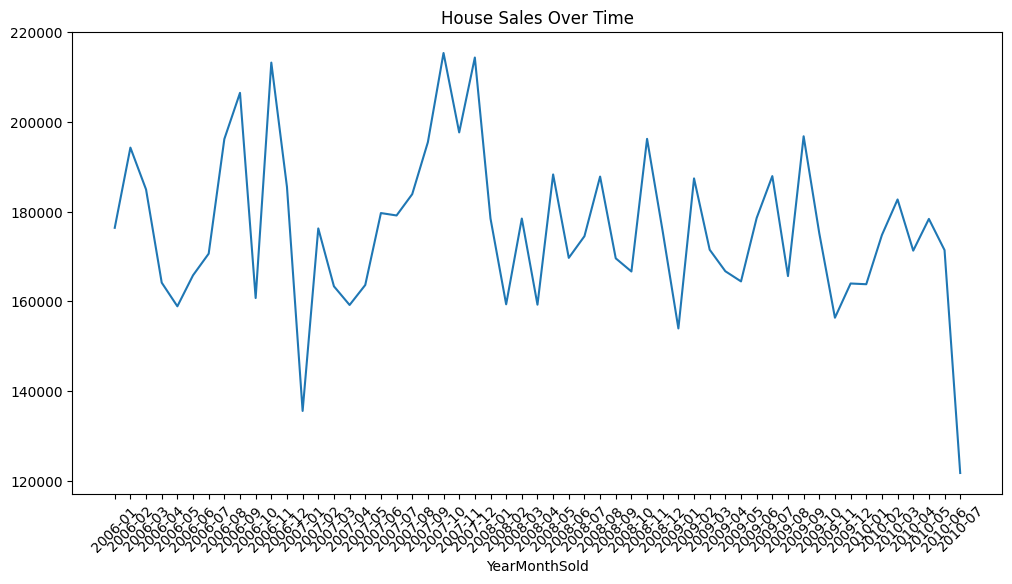

In [132]:
# Create a line plot to visualize house sales over time
df['YearMonthSold'] = df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str).str.zfill(2)
sales_over_time = df.groupby('YearMonthSold')['SalePrice'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_over_time.index, y=sales_over_time.values)
plt.title("House Sales Over Time")
plt.xticks(rotation=45)
plt.show()

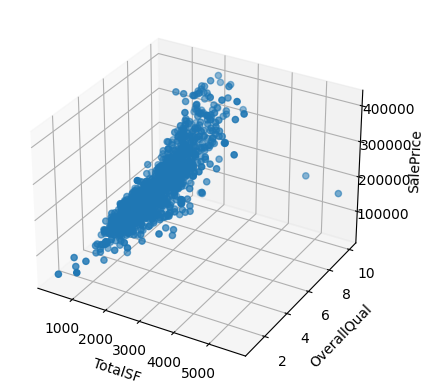

In [133]:
# Create a 3D scatter plot to visualize interactions between three numerical features
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['TotalSF'], df['OverallQual'], df['SalePrice'])
ax.set_xlabel('TotalSF')
ax.set_ylabel('OverallQual')
ax.set_zlabel('SalePrice')
plt.show()

# 5. Statistical Tests and Analysis (questions)

**1. What are The building class and why it is important?**

1. Definition of Building Class:

The "building class" variable, denoted as 'MSSubClass' in the dataset, represents the classification or type of the dwelling based on various characteristics. It typically includes information about the structure and layout of the house. The specific values in this variable encode different categories, each with a unique meaning.

For example, common building classes might include:

    20: 1-STORY 1946 & NEWER ALL STYLES
    30: 1-STORY 1945 & OLDER
    60: 2-STORY 1946 & NEWER

2. Importance of Building Class:

The building class is important for several reasons in the context of the dataset and real estate analysis:

    Affects Property Value: Different building classes can significantly impact the property's market value. For instance, a two-story house may generally have a different market value than a one-story house with similar characteristics.

    Informs Buyer Preferences: Homebuyers often have specific preferences for the style or type of dwelling they are looking for. Understanding the building class can help real estate professionals and sellers target the right audience.

    Guides Property Investment: For real estate investors or developers, the building class informs decisions about property acquisition, renovation, or new construction. It helps them assess the potential return on investment.

    Regulatory Compliance: Local building codes and regulations may vary based on the building class, so it's essential for compliance and permitting processes.

    Market Analysis: Building class data is valuable for market analysis, helping analysts and researchers understand trends and patterns in property sales and values.

**2. How does the overall quality (OverallQual) of a house relate to its sale price?**

In [135]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
correlation, _ = pearsonr(df['OverallQual'], df['SalePrice'])

print(f"Pearson Correlation Coefficient: {correlation:.4f}")

Pearson Correlation Coefficient: 0.7963


In summary, the numerical output (Pearson Correlation Coefficient) of 0.7963 confirms a significant and positive relationship between overall quality and sale price, meaning that higher-quality houses tend to be associated with higher sale prices.

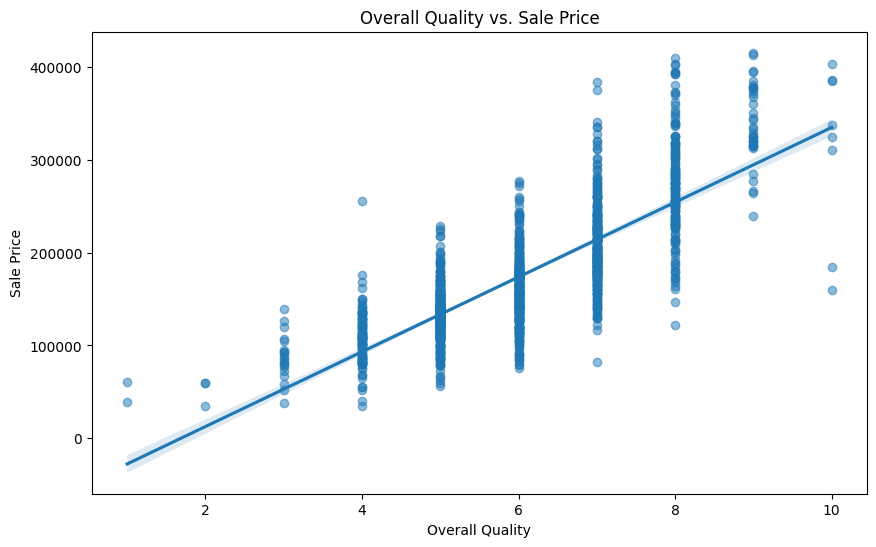

In [136]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='OverallQual', y='SalePrice', data=df, scatter_kws={'alpha':0.5})
plt.title("Overall Quality vs. Sale Price")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

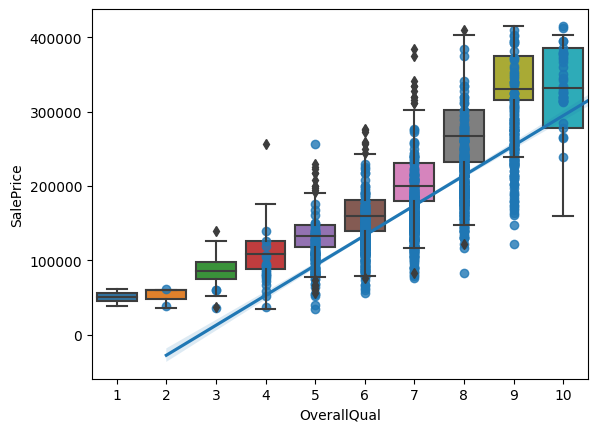

In [137]:
# Create a scatter plot with regression line
sns.regplot(x='OverallQual', y='SalePrice', data=df)

# Create box plots to visualize the distribution of SalePrice for different OverallQual categories
sns.boxplot(x='OverallQual', y='SalePrice', data=df)

As you can see, the line slopes upward from left to right, so it shows a positive correlation, as 'OverallQual' increases, 'SalePrice' tends to increase.

**3. How do the different types of heating (Heating) affect the sale prices?**

In [138]:
from scipy.stats import f_oneway

# Perform ANOVA test to compare means of 'SalePrice' for different heating types
heating_types = df['Heating'].unique()
anova_results = []

for heating_type in heating_types:
    subset = df[df['Heating'] == heating_type]['SalePrice']
    anova_results.append(subset)

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*anova_results)

# Print the results
print(f"ANOVA F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

ANOVA F-Statistic: 5.2373
P-Value: 0.0001


The ANOVA F-Statistic of 5.2373 and a p-value of 0.0001 indicate that there are statistically significant differences in sale prices among different heating types. In other words, there are differences in the average sale prices among the different heating types in the dataset.

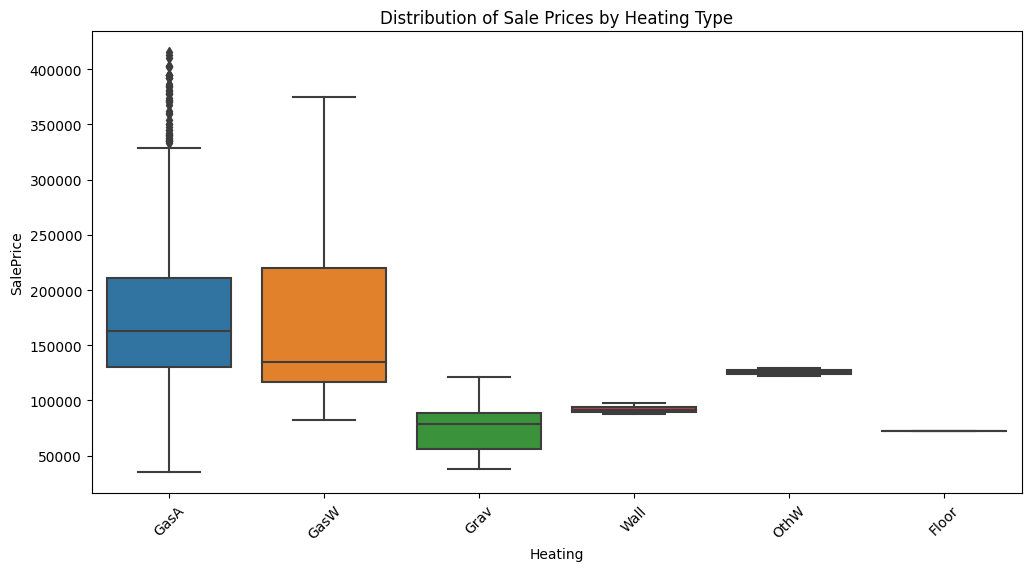

In [139]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Heating', y='SalePrice', data=df)
plt.title("Distribution of Sale Prices by Heating Type")
plt.xticks(rotation=45)
plt.show()

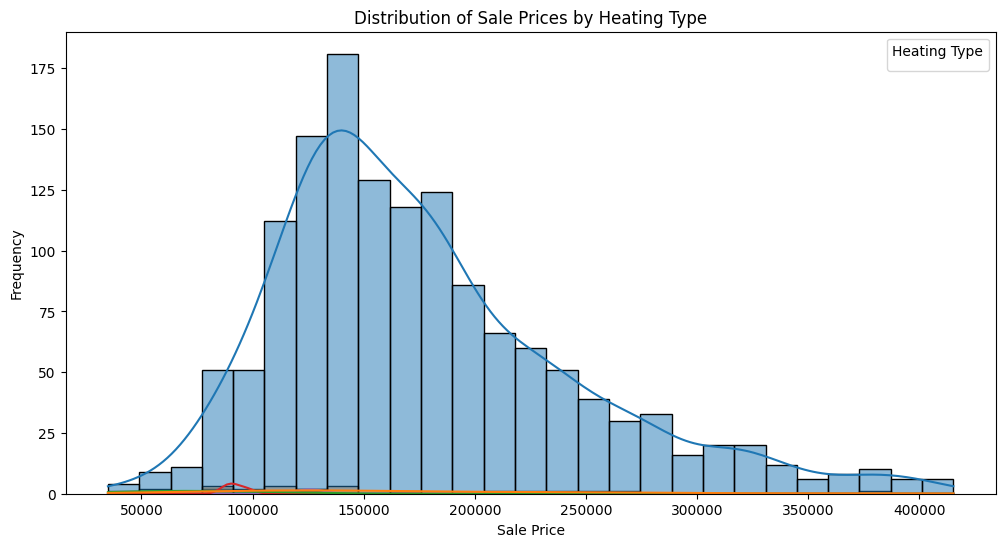

In [156]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='SalePrice', hue='Heating', kde=True)
plt.title("Distribution of Sale Prices by Heating Type")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.legend(title='Heating Type')
plt.show()

As you can see in box plot and histogram, there are statistically significant differences in sale prices among different heating types. In other words, the choice of heating type has a meaningful impact on sale prices.

**4. How do the different types of utilities (Utilities) available in a property relate to sale prices?**

In [140]:
from scipy.stats import f_oneway

# Perform ANOVA test to compare means of 'SalePrice' for different utility types
utility_types = df['Utilities'].unique()
anova_results = []

for utility_type in utility_types:
    subset = df[df['Utilities'] == utility_type]['SalePrice']
    anova_results.append(subset)

# Perform the ANOVA test
f_statistic, p_value = f_oneway(*anova_results)

# Print the results
print(f"ANOVA F-Statistic: {f_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")

ANOVA F-Statistic: 0.3230
P-Value: 0.5699


The ANOVA F-Statistic of 0.3230 and a p-value of 0.5699 indicate that there are no statistically significant differences in sale prices among different types of utilities available in properties.

-The F-Statistic (F-value) of 0.3230 represents the ratio of the between-group variability to within-group variability. In this case, it is relatively low, suggesting that there is not much variation in sale prices attributed to different utility types.

-The relatively high p-value of 0.5699 is substantially greater than the common significance level of 0.05. This suggests a lack of evidence to conclude that utility types have a significant impact on sale prices.

Based on this ANOVA test result, we can conclude that the different types of utilities available in a property do not seem to be associated with significant variations in sale prices. This means that, in this dataset, the type of utilities may not be a major factor influencing property prices.

In [141]:
from scipy.stats import ttest_ind

# Example t-test for two utility types
utility1 = df[df['Utilities'] == 'AllPub']['SalePrice']
utility2 = df[df['Utilities'] == 'NoSeWa']['SalePrice']

t_statistic, p_value = ttest_ind(utility1, utility2)

t_statistic = round(t_statistic, 4)  # Round to 4 decimal places
p_value = round(p_value, 4)  # Round to 4 decimal places

t_statistic, p_value

(0.5683, 0.5699)

-The t-statistic is approximately 0.5683. This value represents the difference in means of sale prices between the 'AllPub' and 'NoSeWa' utility types.

-The p-value is approximately 0.5699. This p-value suggests that there is no significant difference in sale prices between the 'AllPub' and 'NoSeWa' utility types.

In this context, the p-value is greater than the common significance level of 0.05, indicating that there is no strong evidence to conclude that the two utility types have significantly different effects on sale prices.

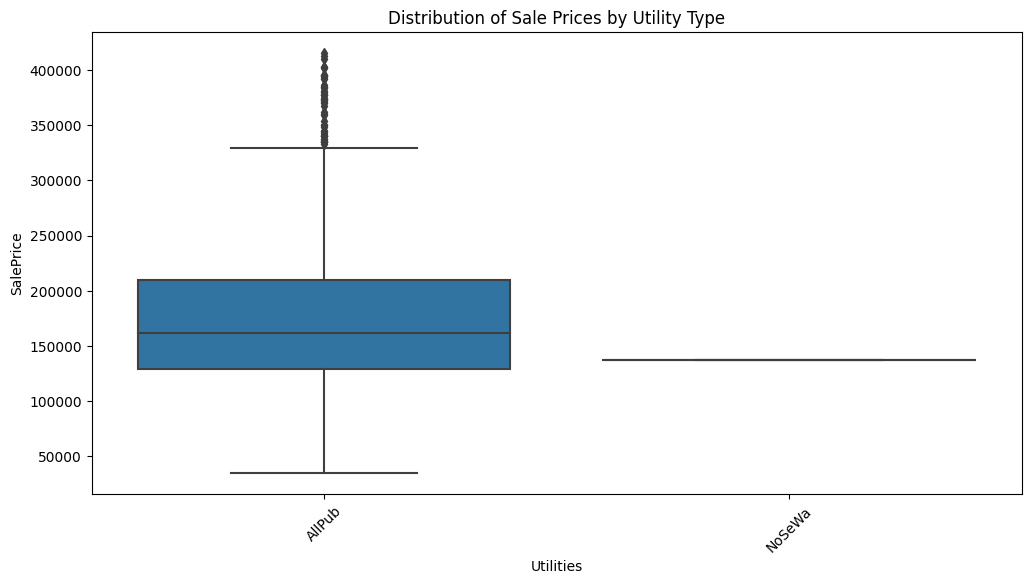

In [142]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Utilities', y='SalePrice', data=df)
plt.title("Distribution of Sale Prices by Utility Type")
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_32/821204479.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='SalePrice', hue='Utilities', common_norm=False)


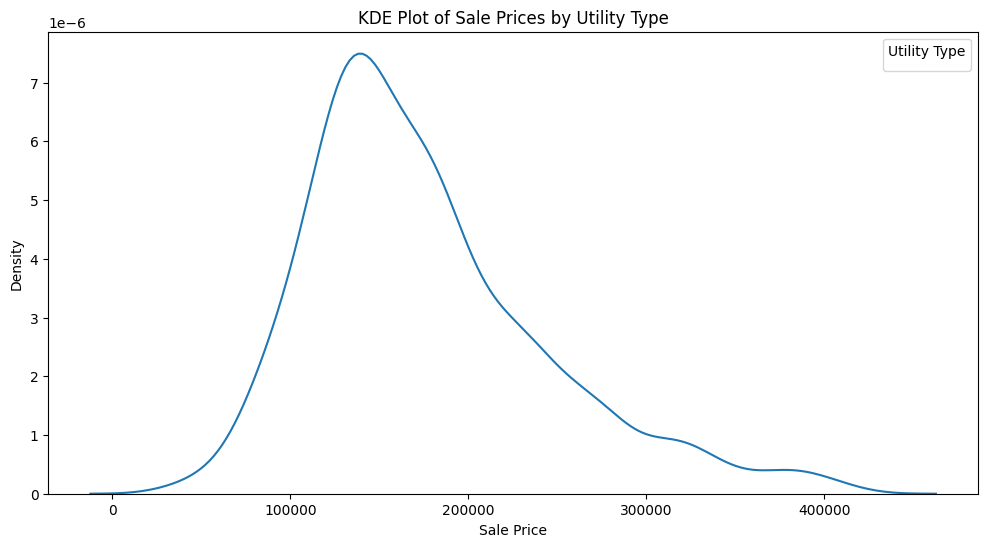

In [158]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='SalePrice', hue='Utilities', common_norm=False)
plt.title("KDE Plot of Sale Prices by Utility Type")
plt.xlabel("Sale Price")
plt.ylabel("Density")
plt.legend(title='Utility Type')
plt.show()

Results are obvious in bar plot too.

**5. Are there any significant differences in property sale prices based on the type of roof material used for the houses? Do certain roof materials contribute to higher or lower sale prices, and if so, how significant are these differences?**

In [149]:
from scipy.stats import f_oneway

# Example ANOVA test for different roof materials
roof_materials = df['RoofMatl'].unique()
data = [df[df['RoofMatl'] == material]['SalePrice'] for material in roof_materials]

f_statistic, p_value = f_oneway(*data)

print("P-Value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in sale prices based on roof material.")
else:
    print("There is no significant difference in sale prices based on roof material.")

P-Value: 0.029319226719694093
There is a significant difference in sale prices based on roof material.


In statistical hypothesis testing, the p-value is a measure of the evidence against a null hypothesis. A p-value less than the significance level (commonly 0.05) suggests that there is significant evidence to reject the null hypothesis.

In this case, since the p-value (0.0293) is less than 0.05,there is a significant difference in sale prices based on the type of roof material used for houses.

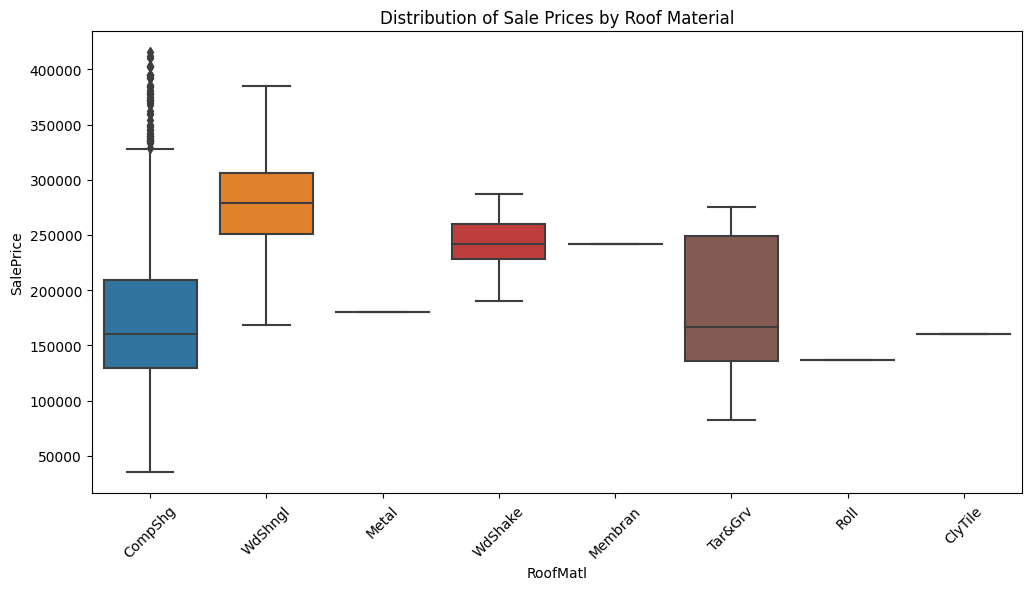

In [150]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='RoofMatl', y='SalePrice', data=df)
plt.title("Distribution of Sale Prices by Roof Material")
plt.xticks(rotation=45)
plt.show()

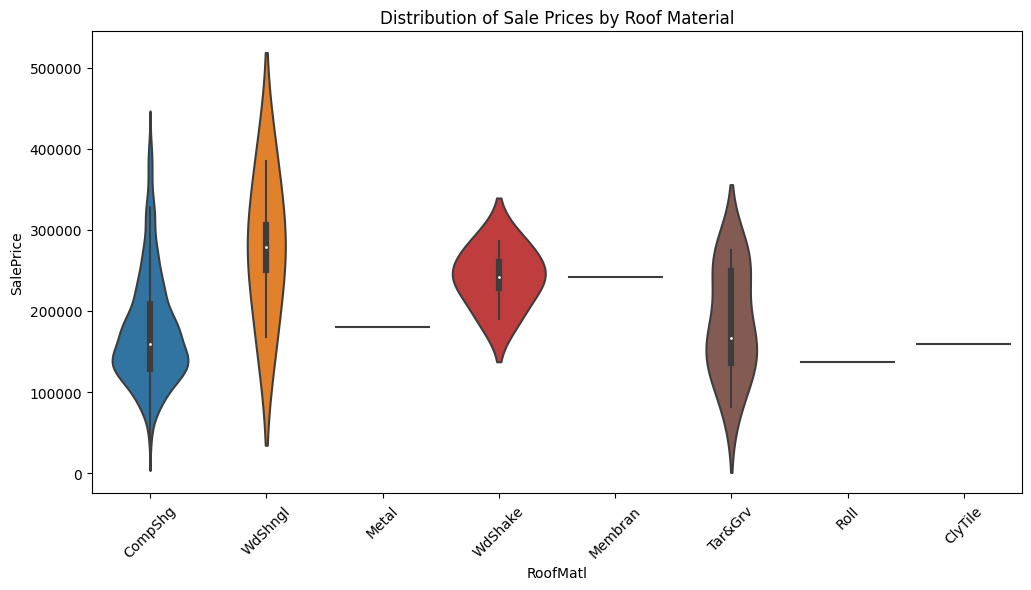

In [152]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='RoofMatl', y='SalePrice', data=df)
plt.title("Distribution of Sale Prices by Roof Material")
plt.xticks(rotation=45)
plt.show()

As you  can see in plots, there is a significant difference in sale prices based on the type of roof material used for houses.

**6. Does the age of a property (YearBuilt) have a significant impact on its sale price?**

In [159]:
from scipy.stats import pearsonr

correlation, _ = pearsonr(df['YearBuilt'], df['SalePrice'])
print(f"Pearson Correlation Coefficient: {correlation:.4f}")

Pearson Correlation Coefficient: 0.5573


-A positive correlation coefficient suggests that as the year in which a property was built (YearBuilt) increases, the sale price tends to increase as well.

-The value of 0.5573 indicates a moderate strength of correlation. It's not a perfect correlation, but there is a noticeable trend that newer properties tend to have higher sale prices.

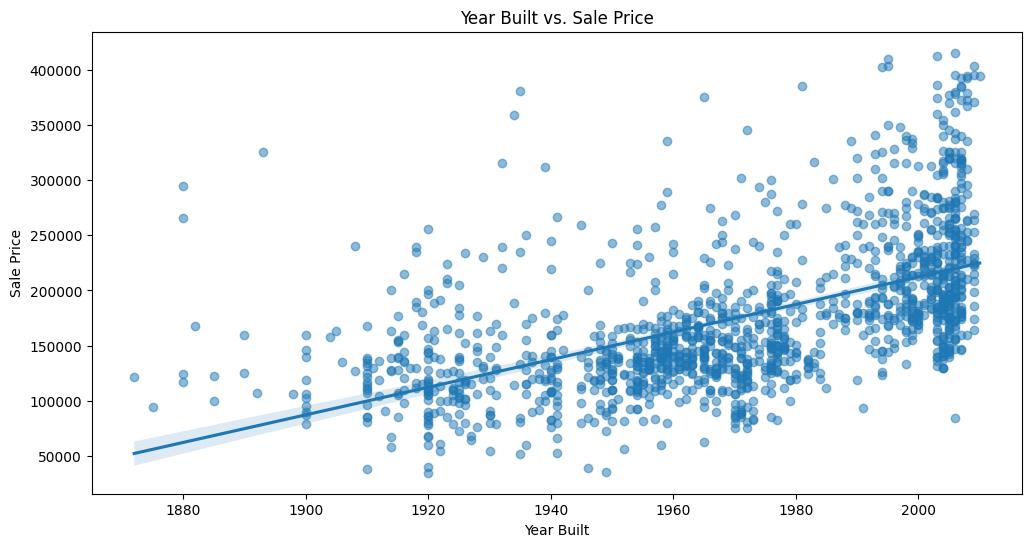

In [160]:
plt.figure(figsize=(12, 6))
sns.regplot(x='YearBuilt', y='SalePrice', data=df, scatter_kws={'alpha': 0.5})
plt.title("Year Built vs. Sale Price")
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.show()

The scatter plot comparing "Year Built" to "Sale Price" reveals a discernible trend. As the year a property was built (YearBuilt) increases, there is a noticeable tendency for sale prices to rise. The upward slope of the regression line underscores this pattern, indicating a positive correlation between the age of the property and its sale price. The data points, while somewhat scattered, generally align with the trendline, affirming the overall relationship. This observation suggests that newer properties, on average, command higher sale prices, pointing to the impact of the property's age on its market value.